In [1]:
from pathlib import Path
import os

In [10]:
from tqdm import tqdm
import numpy as np

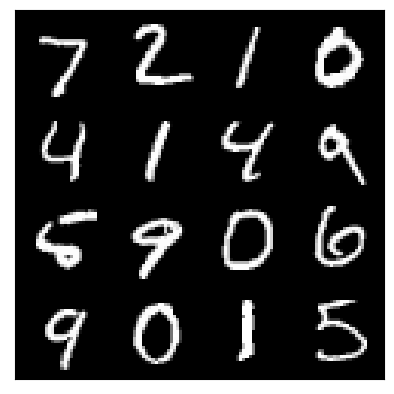

In [22]:
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
trsfm = transforms.Compose([
    transforms.ToTensor(),
])
dataset = datasets.MNIST("./data/", train=False, download=True, transform=trsfm)
plt.figure("MNISI")
data_loader = DataLoader(dataset, batch_size=16)
for data, label in data_loader:
    imgs = make_grid(data, nrow=4)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(transforms.ToPILImage()(imgs))
    break

In [7]:
from model.model import MnistModel
from torchstat import stat
import torch
from data_loader.data_loaders import MnistDataLoader
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [2]:
model = MnistModel()
data_loader = MnistDataLoader('./data/', 16, shuffle=False, validation_split=0.0, training=False, num_workers=2)

In [4]:
checkpoint = torch.load("./saved/models/Mnist_FC/1214_173831/best_model_epoch51.pth")
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [5]:
device = torch.device('cuda:0')
model.to(device)
model.eval()

MnistModel(
  (conv1): Conv3x3(
    (conv): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Conv3x3(
    (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Conv3x3(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (gap): Conv2d(64, 64, kernel_size=(7, 7), stride=(7, 7), groups=64, bias=False)
  (fc1): Linear(in_features=64, out_features=10, bias=True)
  (drop): Dropout(p=0.2, inplace=False)
)

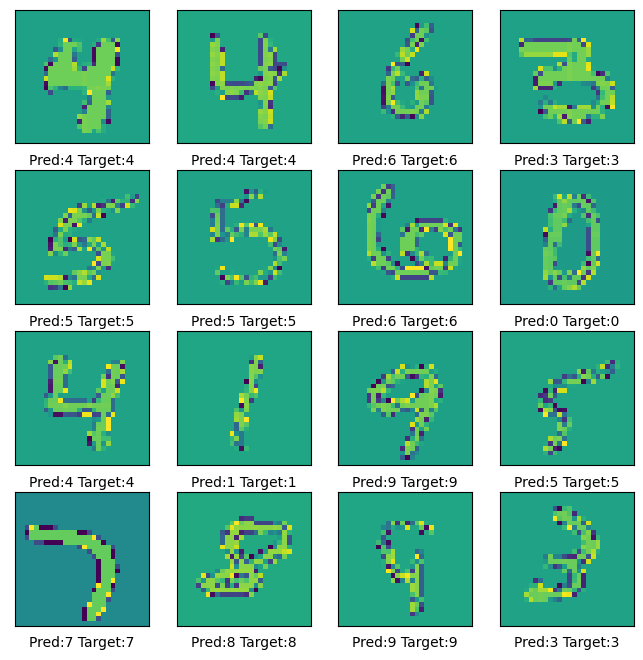

In [23]:
plt.figure(figsize=(8, 8))
with torch.no_grad():
    for i, (data, target) in enumerate(data_loader):
        data, target = data.to(device), target.to(device)
        output = model(data)
        preds = torch.argmax(output, dim=1)
        if (preds == target).sum() != 16:
            for j, img in enumerate(data, 1):
                plt.subplot(4, 4, j)
                plt.xticks([])
                plt.yticks([])
                plt.xlabel(f"Pred:{preds[j - 1]} Target:{target[j - 1]}")
                plt.imshow(transforms.ToPILImage()(img))
            break
        
